In [51]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from matplotlib import pyplot as plt 
%matplotlib inline 

#Lê as entradas
f = open("dados_autent_bancaria.txt")
data = np.loadtxt(f, delimiter=',')

#Separa os dados para treino e teste
# 80% de cada classe para treino e 20% para teste
def split_data(data):
    class_a = []
    class_b = []
    for d in data:
        if(d[-1] == 0):
            class_a.append(d)
        else:
            class_b.append(d)
    
    num_class_a = len(class_a)
    num_class_b = len(class_b)
    
    # 80% de cada classe para treino
    split_point_a = round(num_class_a * 0.8) 
    split_point_b = round(num_class_b * 0.8)
    
    return class_a[:split_point_a], class_a[split_point_a:], class_b[:split_point_b], class_b[split_point_b:]
    
train_a, test_a, train_b, test_b = split_data(data)




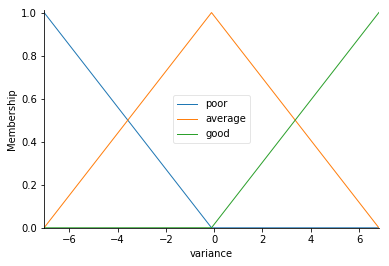

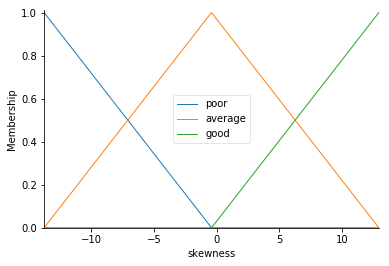

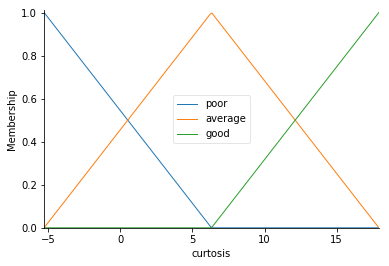

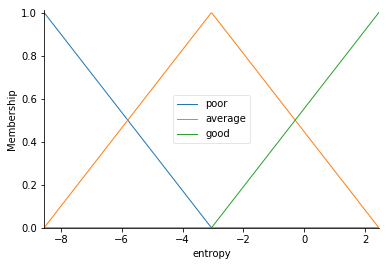

In [58]:

variance = ctrl.Antecedent(sorted(data[:, 0]), 'variance')
skewness = ctrl.Antecedent(sorted(data[:, 1]), 'skewness')
curtosis = ctrl.Antecedent(sorted(data[:, 2]), 'curtosis')
entropy = ctrl.Antecedent(sorted(data[:, 3]), 'entropy')


variance.automf(3)
skewness.automf(3)
curtosis.automf(3)
entropy.automf(3)


variance.view()
skewness.view()
curtosis.view()
entropy.view()